<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0002: Urban Simulation</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Data reading

### Underground network

In [2]:
G = nx.read_graphml('Data/Inputs/london.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

### OD matrix

In [4]:
OD = pd.read_csv('Data/Inputs/OD_matrix.csv',index_col='station_origin')
OD.rename_axis('station_destination', axis=1,inplace=True)

In [5]:
type(OD)

pandas.core.frame.DataFrame

### Flow data

In [6]:
london_OD_AMpeak = pd.read_csv('Data/Inputs/london_flows.csv')

In [7]:
type(london_OD_AMpeak)

pandas.core.frame.DataFrame

## Data inspection

### Underground network

In [8]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_1943/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [9]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'})

In [10]:
# #check that all distances are greater or equal to euclidean distance
# for u,v, data in G.edges(data=True):
#     assert(data['length'] >= distance.euclidean(pos[u], pos[v]))

In [11]:
#if want to know what is the maximum distance between stations
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496304, 'line_name': 'Metropolitan', 'flows': 55124})

In [12]:
#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(u,v) for  u,v in G.edges() if u == 'Baker Street' or v == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [13]:
#We can also check the degree of the nodes in our network and check that they make sense
deg_london = nx.degree(G)

In [14]:
df = pd.DataFrame(index = dict(deg_london).keys())
df['degree'] = dict(deg_london).values()

In [15]:
df.sort_values('degree', ascending =False).head(20)

,degree
Stratford,9
Bank and Monument,8
Baker Street,7
King's Cross St. Pancras,7
Liverpool Street,6
Green Park,6
Waterloo,6
West Ham,6
Oxford Circus,6
Canning Town,6


The inspecting results are consistent with the results of Practical 10.

### OD matrix

In [16]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, Abbey Road to All
Columns: 400 entries, Abbey Road to All
dtypes: int64(400)
memory usage: 1.2+ MB


In [17]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


The inspecting results are consistent with the results of Practical 10.

### Flow data

In [18]:
london_OD_AMpeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [19]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


The inspecting results are consistent with the results of Practical 10.

## London’s underground resilience

In [20]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [21]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)})

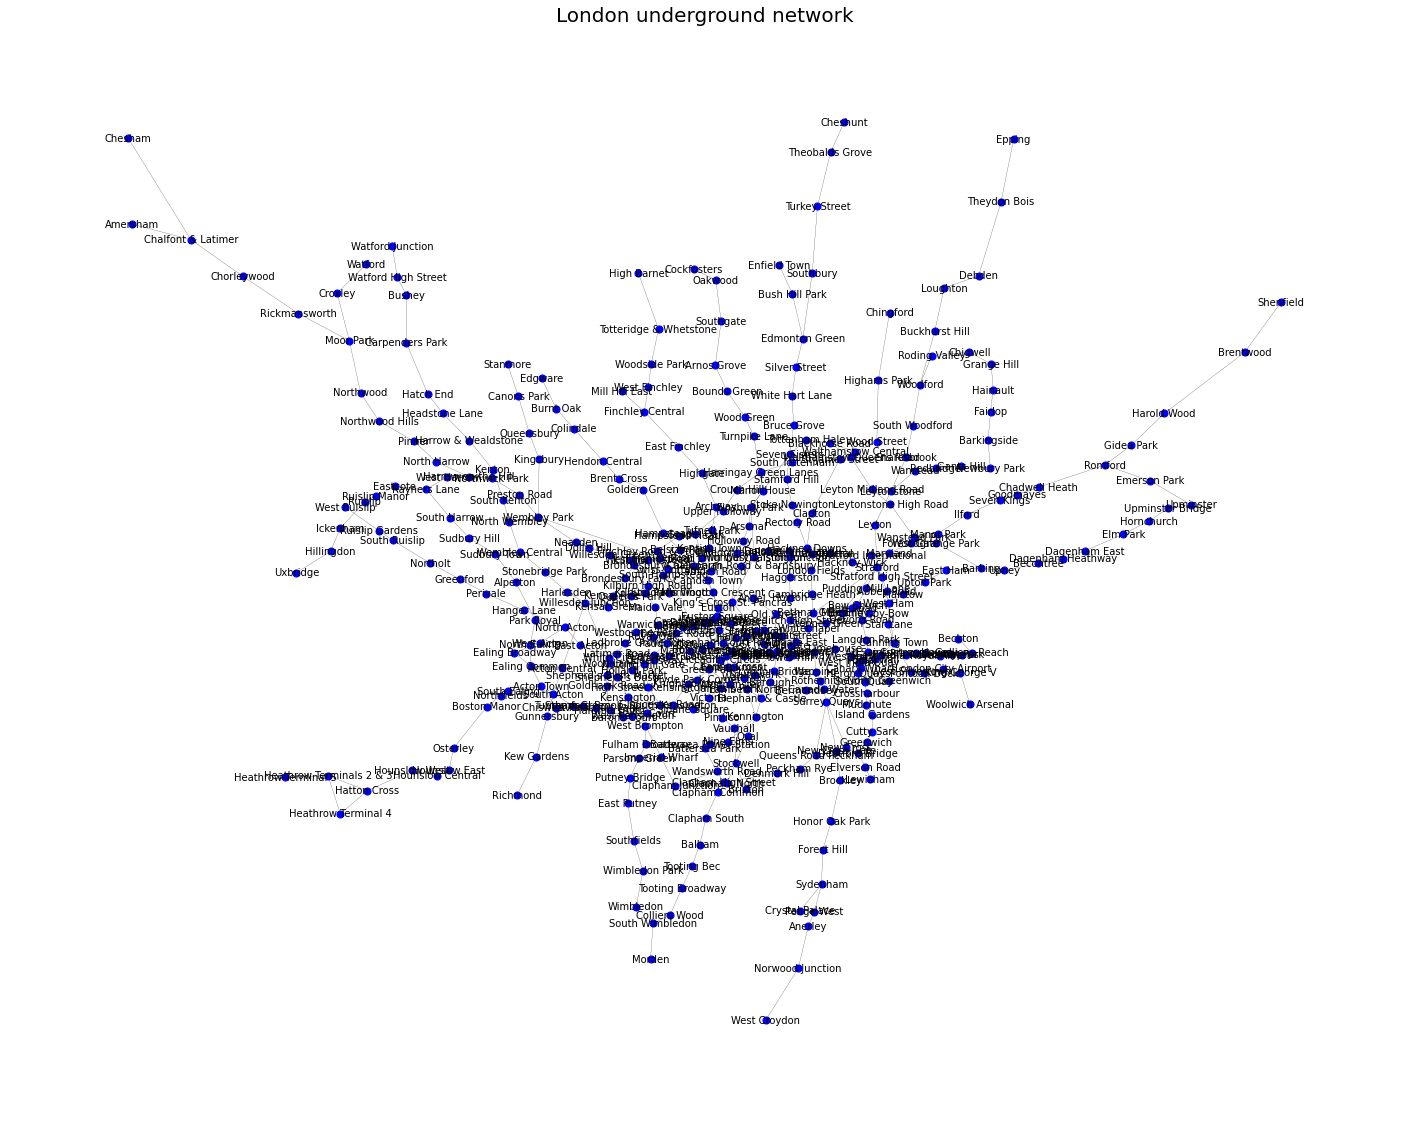

In [22]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

# Nodes
nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
# Edges
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# Labels
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=20)
plt.axis("off")
plt.show()

**It better to normalized to compare more easily?**

### Centrality measures

In [23]:
df_centrality = pd.DataFrame(index=G.nodes())

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
df_centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

clos_london = nx.closeness_centrality(G)
nx.set_node_attributes(G,clos_london,'closeness')
df_centrality['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness')
df_centrality['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))



In [24]:
df_centrality.head(10).sort_values(by=['closeness'],ascending=False)

,degree,closeness,betweenness
Liverpool Street,0.0150,0.110254,0.270807
Stratford,0.0225,0.104384,0.297846
Maryland,0.0050,0.095193,0.063973
Forest Gate,0.0050,0.087489,0.059337
Manor Park,0.0050,0.080939,0.054700
Ilford,0.0050,0.075301,0.050064
Seven Kings,0.0050,0.070398,0.045427
Goodmayes,0.0050,0.066094,0.040791
Chadwell Heath,0.0050,0.062334,0.036217
Romford,0.0075,0.059058,0.032774


#### Degree centrality

In [25]:
df_centrality['degree'].sort_values(ascending=False)

Stratford                   0.0225
Bank and Monument           0.0200
Baker Street                0.0175
King's Cross St. Pancras    0.0175
Liverpool Street            0.0150
                             ...  
Watford Junction            0.0025
Cockfosters                 0.0025
Stratford International     0.0025
Wimbledon                   0.0025
Stanmore                    0.0025
Name: degree, Length: 401, dtype: float64

#### Closeness centrality

In [26]:
df_centrality['closeness'].sort_values(ascending=False)[0:10]

Green Park                  0.114778
Bank and Monument           0.113572
King's Cross St. Pancras    0.113443
Westminster                 0.112549
Waterloo                    0.112265
Oxford Circus               0.111204
Bond Street                 0.110988
Farringdon                  0.110742
Angel                       0.110742
Moorgate                    0.110314
Name: closeness, dtype: float64

#### Betweenness centrality

In [27]:
df_centrality['betweenness'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: betweenness, dtype: float64

In [28]:
df_centrality.sort_values(by='degree',ascending=False)

,degree,closeness,betweenness
Stratford,0.0225,0.104384,0.297846
Bank and Monument,0.0200,0.113572,0.290489
Baker Street,0.0175,0.108962,0.191568
King's Cross St. Pancras,0.0175,0.113443,0.255307
Liverpool Street,0.0150,0.110254,0.270807
...,...,...,...
Watford Junction,0.0025,0.042427,0.000000
Cockfosters,0.0025,0.055279,0.000000
Stratford International,0.0025,0.094540,0.000000
Wimbledon,0.0025,0.054407,0.000000


In [29]:
df_ranking = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking['rank'] = rank

degree_rank = df_centrality.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality['degree'].sort_values(ascending=False).values.tolist()
clos_rank = df_centrality.sort_values(by='closeness',ascending=False).index.values.tolist()
clos_value = df_centrality['closeness'].sort_values(ascending=False).values.tolist()
bet_rank = df_centrality.sort_values(by='betweenness',ascending=False).index.values.tolist()
bet_value = df_centrality['betweenness'].sort_values(ascending=False).values.tolist()

df_ranking['degree'] = degree_rank
df_ranking['degree_value'] = degree_value
df_ranking['closeness'] = clos_rank
df_ranking['closeness_value'] = clos_value
df_ranking['betweenness'] = bet_rank
df_ranking['betweenness_value'] = bet_value

df_ranking.head(10)


,rank,degree,degree_value,closeness,closeness_value,betweenness,betweenness_value
0,1,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489
2,3,Baker Street,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.112265,Waterloo,0.243921
5,6,Green Park,0.0150,Oxford Circus,0.111204,Green Park,0.215835
6,7,Waterloo,0.0150,Bond Street,0.110988,Euston,0.208324
7,8,West Ham,0.0150,Farringdon,0.110742,Westminster,0.203335
8,9,Oxford Circus,0.0150,Angel,0.110742,Baker Street,0.191568
9,10,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085


## Spatial interaction models

### Models and calibration

#### Introduction

#### Parameter calibration

### Scenarios

#### Scenario A

#### Scenario B

#### Scenarios discussion